In [2]:
import pandas as pd
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

# Step 1: Load the data
df = pd.read_csv('/content/icecream.csv')

# Display the first few rows to understand the structure
print(df.head())

# Step 2: Examine the data
# Assuming the data contains a distance matrix or a set of features
# For example, let's assume the dataframe has columns: 'Feature1', 'Feature2', ..., 'FeatureN'
features = df.columns.tolist()

     Brand  Price  Availability  Taste  Flavour  Consistency  Shelflife
0     Amul      4             5      4        3            4          3
1  Nandini      3             2      3        2            3          3
2  Vadilal      2             2      4        3            4          4
3   Vijaya      3             1      3        5            3          4
4    Dodla      3             3      3        4            4          3


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

In [5]:
# Exclude the 'Brand' column
df_numeric = df.drop('Brand', axis=1)

# Standardize the numeric data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Compute the distance matrix
distance_matrix = pairwise_distances(df_scaled, metric='euclidean')

In [6]:
# Apply Multidimensional Scaling
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
coordinates = mds.fit_transform(distance_matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


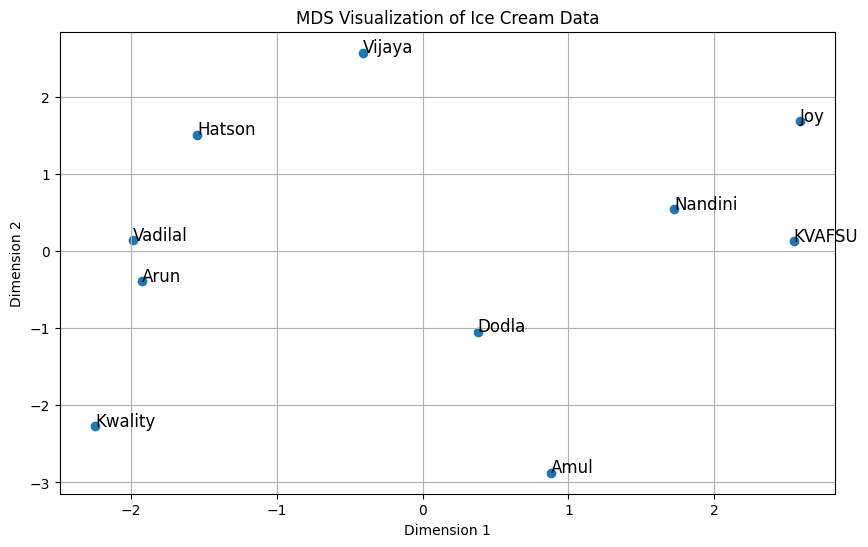

In [7]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(coordinates[:, 0], coordinates[:, 1])

# Annotate points with brand names
for i, brand in enumerate(df['Brand']):
    plt.text(coordinates[i, 0], coordinates[i, 1], brand, fontsize=12)

plt.title('MDS Visualization of Ice Cream Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()